# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import itertools
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from t3_constants import *
from t3_utility import *

In [11]:
with open(f'{PICKLE_FOLDER}{LABELLED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{LABELLED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [12]:
p_df = u_df[[ICNT, AIXB, PSUM]]
p_a, p_df = scale_df(p_df, 1)
p_df[WLAB] = p_df[ICNT] + p_df[AIXB] + p_df[PSUM]
p_df[LAB] = rankings(p_df[WLAB], 1, 8)
p_df[LAB] = p_df[LAB].map({0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2})
p_df.groupby(LAB).describe()

item_count                                                              \
           count      mean       std       min       25%       50%       75%   
label                                                                          
0          298.0 -0.888201  0.397820 -2.411239 -1.112819 -0.814663 -0.631922   
1          298.0  0.030876  0.373559 -0.958932 -0.252014  0.036524  0.286590   
2          199.0  1.283834  0.850363 -0.151026  0.805958  1.104114  1.520089   

                avg_items_per_basket            ... total_price            \
            max                count      mean  ...         75%       max   
label                                           ...                         
0      0.050951                298.0 -0.772918  ...   -0.559073 -0.002558   
1      1.118541                298.0 -0.001519  ...    0.269947  1.300844   
2      7.216308                199.0  1.159709  ...    1.470140  5.975984   

         all                                                              \
       count      mean       std       min       25%       50%       75%   
label                                                                      
0      298.0 -2.490040  0.985687 -6.125937 -3.132335 -2.353469 -1.651840   
1      298.0  0.018776  0.774217 -1.199055 -0.644531  0.057484  0.669673   
2      199.0  3.700687  2.470739  1.566486  2.202323  3.074980  4.252655   

                  
             max  
label             
0      -1.217540  
1       1.565934  
2      20.567831  

[3 rows x 32 columns]

<AxesSubplot:ylabel='Frequency'>

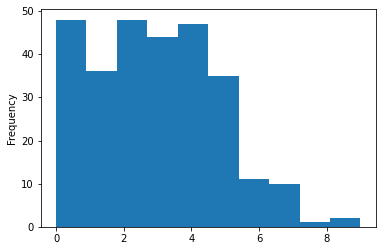

In [13]:
u_df[WLAB] = p_df[LAB]
u_df[u_df[WLAB] == 0][LAB].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

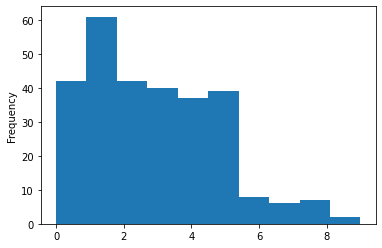

In [14]:
u_df[u_df[WLAB] == 1][LAB].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

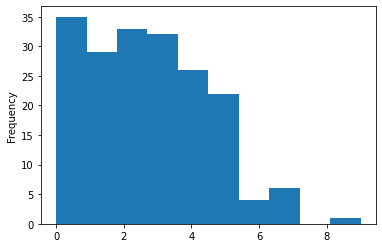

In [15]:
u_df[u_df[WLAB] == 2][LAB].plot(kind='hist')

In [16]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 1 to 823
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_count            795 non-null    int64  
 1   item_dist_count       795 non-null    int64  
 2   max_items_per_b       795 non-null    int64  
 3   price_entropy         795 non-null    float64
 4   max_item_dist_per_b   795 non-null    int64  
 5   total_price           795 non-null    float64
 6   basket_count          795 non-null    int64  
 7   category_count        795 non-null    int64  
 8   shop_count            795 non-null    int64  
 9   avg_items_per_basket  795 non-null    float64
 10  avg_baskets_per_d     795 non-null    float64
 11  label                 754 non-null    object 
 12  all                   795 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 87.0+ KB


In [19]:
train_x, test_x, train_y, test_y = train_test_split(
    u_df.drop(columns=[WLAB, LAB]),
    u_df[WLAB],
    test_size=0.2,
    stratify=u_df[WLAB])
x = train_x.values
y = train_y.values.ravel().astype(int)
y

array([2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0,
       0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1,
       2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0,

In [20]:
def cross_validation(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Return validation scores across the k folds of cross-validation."""
    skf = StratifiedKFold(n_splits=n_splits, random_state=0, shuffle=True)
    val_score = []
    for train_index, test_index in skf.split(X, y):
        model.fit(X[train_index], y[train_index].ravel())
        val_score.append(model.score(X[test_index], y[test_index].ravel() + 1))
    return np.array(val_score)

def cross_validation_summary(model, X: np.ndarray, y: np.ndarray, n_splits: int) -> np.ndarray:
    """Returns validation accuracy score of model (mean and std over all the splits)."""
    val_score = cross_validation(model, X, y, n_splits)
    return val_score.mean(), val_score.std()


In [21]:
## Hyper-parameters grid search for Decision Tree

hyp_dict = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0, 1, 1e-1, 1e-2, 1e-3, 1e-4],
    'min_samples_leaf': [1, 3, 5]
}
combinations = itertools.product(*(hyp_dict[key] for key in sorted(hyp_dict)))

results = []

for criterion, min_impurity_decrease, min_samples_leaf in combinations:
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, x, y, 3)
    res = criterion, min_impurity_decrease, min_samples_leaf, mean_val_score, std_val_score
    results.append(res)

decision_tree_results_df = pd.DataFrame(results, columns=['criterion', 'min_impurity_decrease', 'min_samples_leaf', 'mean_val_score', 'std_val_score'])
decision_tree_results_df.sort_values('mean_val_score')

,criterion,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
3,gini,1.0000,1,0.000000,0.000000
4,gini,1.0000,3,0.000000,0.000000
5,gini,1.0000,5,0.000000,0.000000
23,entropy,1.0000,5,0.000000,0.000000
22,entropy,1.0000,3,0.000000,0.000000
21,entropy,1.0000,1,0.000000,0.000000
17,gini,0.0001,5,0.031447,0.013526
2,gini,0.0000,5,0.031447,0.013526
14,gini,0.0010,5,0.031447,0.013526
1,gini,0.0000,3,0.042453,0.011554


In [22]:
decision_tree_results_df.groupby('criterion').mean()

,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
criterion,,,,
entropy,0.185183,3.0,0.049266,0.017190
gini,0.185183,3.0,0.040793,0.011233


[Text(0.5, 0.875, 'item_count <= 620.0\nentropy = 1.561\nsamples = 636\nvalue = [239, 238, 159]'),
 Text(0.25, 0.625, 'total_price <= 494595.562\nentropy = 0.585\nsamples = 264\nvalue = [227, 37, 0]'),
 Text(0.125, 0.375, 'avg_items_per_basket <= 13.513\nentropy = 0.178\nsamples = 187\nvalue = [182, 5, 0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'avg_items_per_basket <= 11.8\nentropy = 0.979\nsamples = 77\nvalue = [45, 32, 0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'total_price <= 698408.125\nentropy = 1.164\nsamples = 372\nvalue = [12, 201, 159]'),
 Text(0.625, 0.375, 'avg_items_per_basket <= 15.558\nentropy = 0.625\nsamples = 202\nvalue = [12, 179, 11]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'avg_items_per_basket <= 13.248\nentropy = 0.556\nsamples = 170\nvalue = [0, 22, 148]'),
 Text(0.8125, 0.125, '\n  (

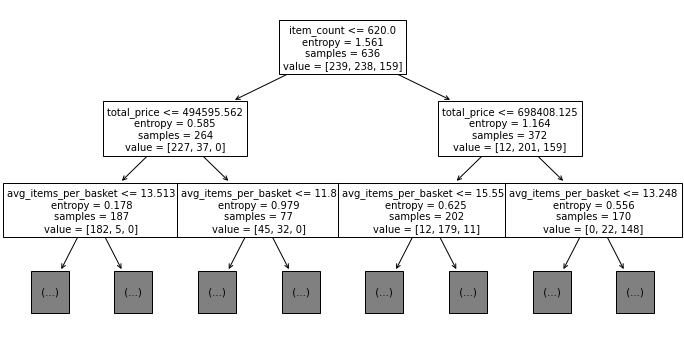

In [24]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01, min_samples_leaf=1, random_state=0)
model.fit(x, y)
plt.figure(figsize=(12, 6))
tree.plot_tree(model, fontsize=10, max_depth=2, feature_names=train_x.columns)

In [25]:
pd.Series(model.feature_importances_, index = train_x.columns).sort_values()

max_items_per_b         0.000000
price_entropy           0.000000
max_item_dist_per_b     0.000000
basket_count            0.000000
category_count          0.000000
shop_count              0.000000
avg_baskets_per_d       0.000000
item_dist_count         0.028655
avg_items_per_basket    0.161387
total_price             0.333030
item_count              0.476927
dtype: float64

# Ensembling

In [28]:
def randomized_cv(model, random_grid, n_iter=100):
    """Perform hyper-parameters grid search and return best configuration."""
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = n_iter, cv = 5, verbose=0, random_state=0, n_jobs = -1)

    # Run grid search
    rf_random.fit(x, y)
    mean_acc, std_acc = cross_validation_summary(rf_random.best_estimator_, x, y, 5)

    # Print configuration  and stats about best model
    print(f'{rf_random.best_estimator_}\n mean acc: {mean_acc:.3f}\n std_acc: {std_acc:.3f}')

## Random Forest

In [30]:
# Perform the hyper-parameters grid-search on random forest
random_grid = dict(
    n_estimators = np.logspace(1, 2.5, num=10).astype(int).tolist(),
    max_features = ['sqrt'],
    max_depth = [None] + np.logspace(0.5, 2, num=9).astype(int).tolist(),
    min_samples_split = [2, 5, 10],
    min_samples_leaf = [1, 2, 4],
    bootstrap = [True, False]
)
randomized_cv(
    model=RandomForestClassifier(random_state=0),
    random_grid=random_grid,
    n_iter=1000
)

RandomForestClassifier(max_depth=42, n_estimators=21, random_state=0)
 mean acc: 0.039
 std_acc: 0.013
